# Snake

In [1]:
import environments_fully_observable 
import environments_partially_observable
import numpy as np
from  tqdm import trange
import matplotlib.pyplot as plt
import random
import tensorflow as tf
tf.random.set_seed(0)
random.seed(0)
np.random.seed(0)

## Environment definition

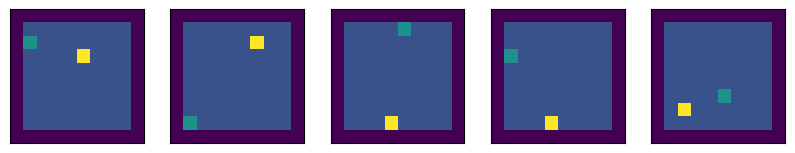

In [2]:
%matplotlib inline
# function to standardize getting an env for the whole notebook
def get_env(n=10):
    # n is the number of boards that you want to simulate parallely
    # size is the size of each board, also considering the borders
    # mask for the partially observable, is the size of the local neighborhood
    size = 10
    e = environments_fully_observable.OriginalSnakeEnvironment(n, size)
    # e = environments_partially_observable.OriginalSnakeEnvironment(n, size, 2)
    return e
env_ = get_env()
GAMMA = .9
ITERATIONS = 5000

fig,axs=plt.subplots(1,min(len(env_.boards), 5), figsize=(10,3))
for ax, board in zip(axs, env_.boards):
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.imshow(board, origin="lower")

## Model

In [3]:
import DQN

env_ = get_env(100)
input_shape = env_.to_state().shape[1:]

GAMMA = .9
ITERATIONS = 100

DQN_agent = DQN.DQNAgent(input_shape=input_shape,num_actions=4)

if tf.config.list_physical_devices('GPU'):
    print('GPU is available.')
else:
    print('GPU is not available. Switching to CPU.')


value = ...


q = ...


GPU is not available. Switching to CPU.


## Training

In [4]:
optimizer = tf.keras.optimizers.legacy.Adam(1e-4)

In [5]:
for iteration in trange(ITERATIONS):
    state = env_.to_state()

    # Select actions using the DQN agent
    actions = np.array([DQN_agent.select_action(state[i]) for i in range(env_.n_boards)]).reshape(-1,1)
    # Move in the environment and get rewards
    rewards = env_.move(actions)

    # Store the transition in the replay buffer
    for i in range(env_.n_boards):
        DQN_agent.store_transition(state[i], actions[i], rewards[i].numpy(), env_.to_state()[i])

    # Experience replay for Q-learning to update the DQN model
    DQN_agent.experience_replay_q(batch_size=32)

    # Experience replay for V-learning to update the Value model
    DQN_agent.experience_replay_v(batch_size=32)

    # Update the target Q model every 10 iterations
    if iteration % 10 == 0:
        DQN_agent.update_target_q_model()


  0%|          | 0/5000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


  0%|          | 1/5000 [00:04<6:40:56,  4.81s/it]

1/1 [==============================] - 0s 20ms/step


  0%|          | 2/5000 [00:09<6:42:20,  4.83s/it]

1/1 [==============================] - 0s 16ms/step


  0%|          | 2/5000 [00:13<9:22:41,  6.76s/it]


KeyboardInterrupt: 

In [ ]:
import AStar_Heuristic

agent = AStar_Heuristic.Heuristic_Agent(env_)
agent.execute(ITERATIONS)


In [ ]:
for iteration in trange(ITERATIONS):
    # get current state of the boards
    state = env_.to_state()
    
    with tf.GradientTape(persistent=True) as tape:
        """ 
        tensor of actions, consider that
            UP = 0
            RIGHT = 1
            DOWN = 2
            LEFT = 3
        """
        actions = [DQN_agent.select_action(state[i]) for i in range(env_.n_boards)]
        rewards = env_.move(actions)
        new_state = tf.constant(env_.to_state())

        # calculate the loss of whichever algorithm you have picked
        loss = ...

    gradient = tape.gradient(..., ...)
    optimizer.apply_gradients(zip(gradient, ...))

  0%|          | 0/5000 [00:00<?, ?it/s]


TypeError: len() of unsized object

 ### Random policy reward
 
Just a baseline (not the one you are supposed to develop)

In [ ]:
random_env = get_env(100)
random_rewards = []

for _ in trange(1000):
    probs = tf.convert_to_tensor([[.25]*4]*random_env.n_boards)
    #sample actions
    actions =  tf.random.categorical(tf.math.log(probs), 1, dtype=tf.int32)
    # MDP update
    rewards = random_env.move(actions)
    random_rewards.append(np.mean(rewards))

100%|██████████| 1000/1000 [00:02<00:00, 442.68it/s]
